In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = sns.load_dataset('titanic')
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
dataset.shape

(891, 15)

In [6]:
# listing down the column
dataset.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

categorical column

. survived
.pclass
.sex
.sibsp
.parch
.Embarked

numerical column

.Age
.Fare
.passenger ID

mixed column

. deck


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Few conclusions

# 1 . missing values in Age , Deck, and Embarked column
# 2 . more than 70% value in deck are missing in deck column, will have to Drop
# 3. Few column have inappropriate data types 

In [10]:
# dropping deck column

# dataset.drop(columns=['deck'], inplace=  True)


In [11]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
# imputing missing values for age
# startegy = mean

dataset['age'].fillna(dataset['age'].mean(), inplace = True)

In [13]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
# imputing missing value for Embark

# finding the most appeared value in Embark column 

dataset['embarked'].value_counts()


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
dataset['embarked'].fillna('S' ,inplace = True)

In [16]:
# want to change one more thing

# should i change the sibsp and parch to categories

dataset['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [17]:
dataset['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

chaning the data types for the following cols

. survived(category)
.pclass(category)
.sex(category)
.age(int)
.Embarked(category)

In [18]:
dataset['survived'] = dataset['survived'].astype('category')
dataset['pclass'] = dataset['pclass'].astype('category')
dataset['sex'] = dataset['sex'].astype('category')
dataset['age'] = dataset['age'].astype('int')
dataset['Embarked'] = dataset['embarked'].astype('category')

In [19]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Embarked
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,S
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,C
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,S
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,S
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,S
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,S
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,S
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,C


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          891 non-null    int32   
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  Embarked     891 non-null    category
dtypes: bool(2), category(6), float64(1), int32(1), int64(2), object(4)
memory usage: 60.3+ KB


In [21]:
# five point summary

dataset.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


out of 891. 38% percant people died in the accident


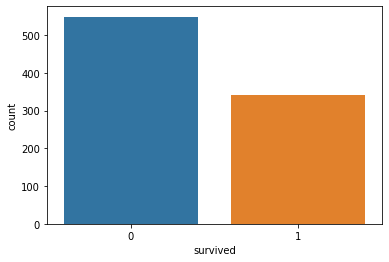

In [22]:
# Univariate Analysis
# let's start with survived column

sns.countplot(x =dataset['survived'])

death_percent = round((dataset['survived'].value_counts() .values[1]/891) * 100)
print('out of 891. {}% percant people died in the accident'.format(death_percent))


3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64


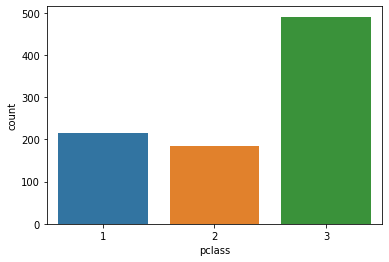

In [23]:
# pclass column

print(dataset['pclass'].value_counts() / 891 * 100)
sns.countplot(x = dataset['pclass'])
plt.show()

male      64.758698
female    35.241302
Name: sex, dtype: float64


<AxesSubplot: xlabel='sex', ylabel='count'>

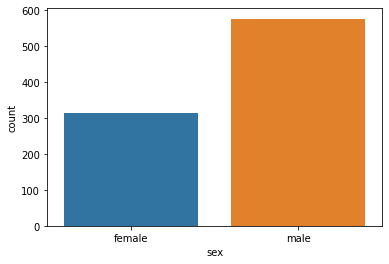

In [24]:
print(dataset['sex'].value_counts() / 891 *100)
sns.countplot(x = dataset['sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64


<AxesSubplot: xlabel='sibsp', ylabel='count'>

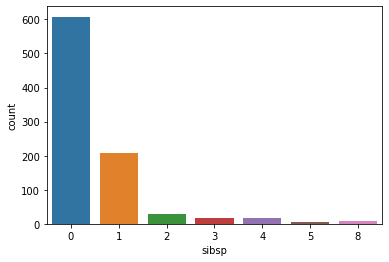

In [25]:
print(dataset['sibsp'].value_counts())
sns.countplot(x = dataset['sibsp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: parch, dtype: float64


<AxesSubplot: xlabel='parch', ylabel='count'>

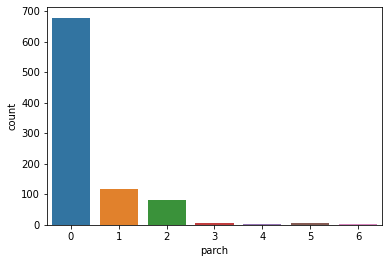

In [26]:
print((dataset['parch'].value_counts()/ 891) * 100)
sns.countplot(x = dataset['parch'])


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<AxesSubplot: xlabel='Embarked', ylabel='count'>

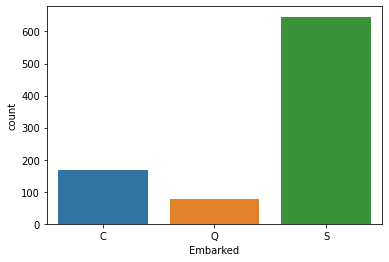

In [27]:
print(dataset['Embarked'].value_counts() / 891 *100)
sns.countplot(x = dataset['Embarked'])

C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\1501643341.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


0.45956263424701577
0.9865867453652877


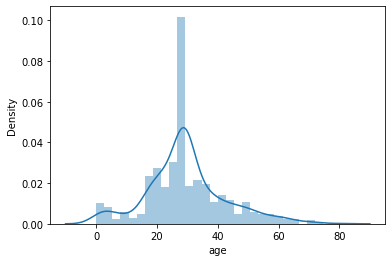

In [28]:
#  age column

sns.distplot(dataset['age'])
print(dataset['age'].skew())
print(dataset['age'].kurt())

plt.show()

<AxesSubplot: >

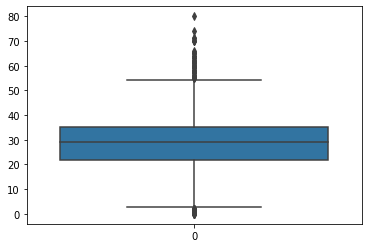

In [29]:
sns.boxplot(dataset['age'])

In [36]:
# just out of curiosity

print('people in age between 60 to 70 are',dataset[(dataset['age'] > 60) & (dataset['age'] < 70)].shape[0])
print('people with age greater than 70 and 75 are',dataset[(dataset['age'] >= 70) & (dataset['age'] <= 75)].shape[0])
print('people with age greater than 75 are',dataset[(dataset['age'] > 75)].shape[0])


print('people with age between 0 and 1 are',dataset[(dataset['age'] < 1)].shape[0])

people in age between 60 to 70 are 15
people with age greater than 70 and 75 are 6
people with age greater than 75 are 1
people with age between 0 and 1 are 7


conclution


.for all practical purposes age can be considered as normal distribution
. Deeper analysis is required for outlier dectection

C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\1797077932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['fare'])


<AxesSubplot: xlabel='fare', ylabel='Density'>

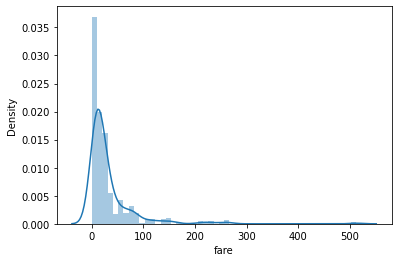

In [39]:
# Fare column

sns.distplot(dataset['fare'])


In [40]:
print(dataset['fare'].skew())
print(dataset['fare'].kurt())

4.787316519674893
33.39814088089868


<AxesSubplot: >

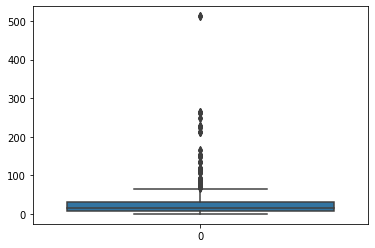

In [41]:
sns.boxplot(dataset['fare'])

In [46]:
print('people with fare in between $200 to $300 is',dataset[(dataset['fare'] > 200) & (dataset['fare'] < 300)].shape[0])
print('people with fare in grater than $300 is',dataset[(dataset['fare'] > 300)].shape[0])

people with fare in between $200 to $300 is 17
people with fare in grater than $300 is 3


comclutions

.highly skewed data, a lot of people had cheaper tickets
.outliers are there in the data 

survived,0,1
pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


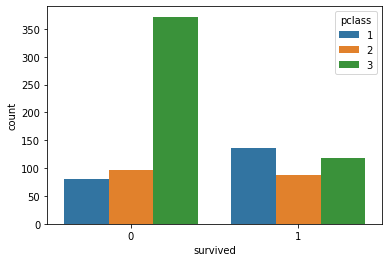

In [66]:
# multivariate Analysis
# survival with p class
sns.countplot(x = 'survived',hue = 'pclass', data=dataset)

pd.crosstab(dataset['pclass'], dataset['survived']).apply(lambda r: round((r / r .sum()) * 100,1),axis = 1)

survived,0,1
pclass,,
1,8.978676,15.263749
2,10.886644,9.764310
3,41.750842,13.355780


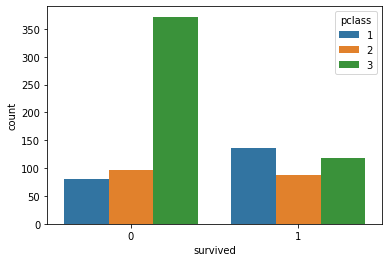

In [80]:
# survival with p class
# 2nd method of using croostab

sns.countplot(x = 'survived',hue = 'pclass', data=dataset)
pd.crosstab(dataset['pclass'], dataset['survived'],normalize=True)* 100


survived,0,1
sex,,
female,9.090909,26.150393
male,52.525253,12.233446


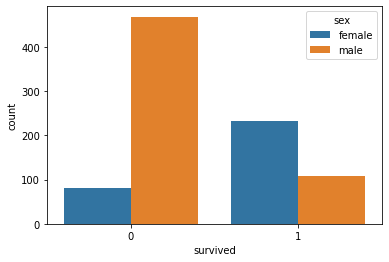

In [85]:
# survival with sex


sns.countplot(x = 'survived' , hue= 'sex', data=dataset)
pd.crosstab(dataset['sex'], dataset['survived'], normalize=True) *100


survived,0,1
Embarked,,
C,8.417508,10.437710
Q,5.274972,3.367003
S,47.923681,24.579125


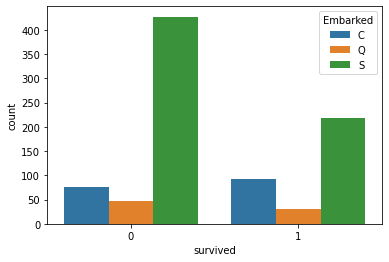

In [87]:
# survived with embarked

sns.countplot(x = 'survived', hue = 'Embarked', data = dataset)
pd.crosstab(dataset['Embarked'], dataset['survived'], normalize=True) * 100

C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\1561370231.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['survived'] == 0]['age'])
C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\1561370231.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['sur

<AxesSubplot: xlabel='age', ylabel='Density'>

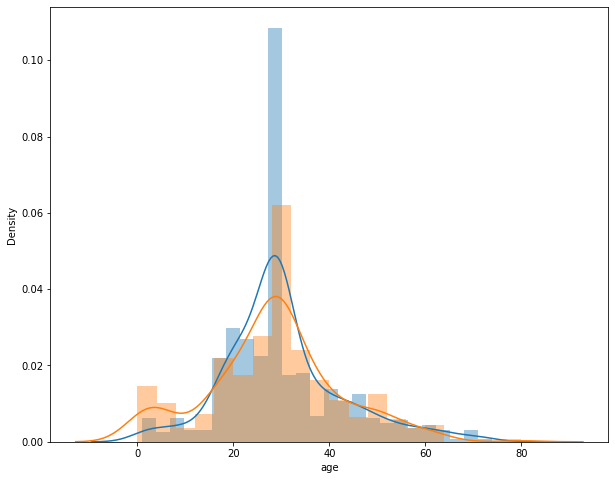

In [103]:
# survived with age

plt.figure(figsize = (10,8))
sns.distplot(dataset[dataset['survived'] == 0]['age'])
sns.distplot(dataset[dataset['survived'] == 1]['age'])


C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\2427771043.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['survived'] == 0]['fare'])
C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\2427771043.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['su

<AxesSubplot: xlabel='fare', ylabel='Density'>

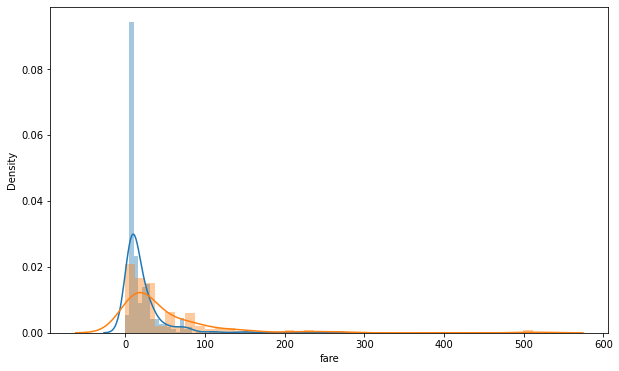

In [108]:
# survived with fare

plt.figure(figsize = (10,6))
sns.distplot(dataset[dataset['survived'] == 0]['fare'])
sns.distplot(dataset[dataset['survived'] == 1]['fare'])


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Figure size 720x432 with 0 Axes>

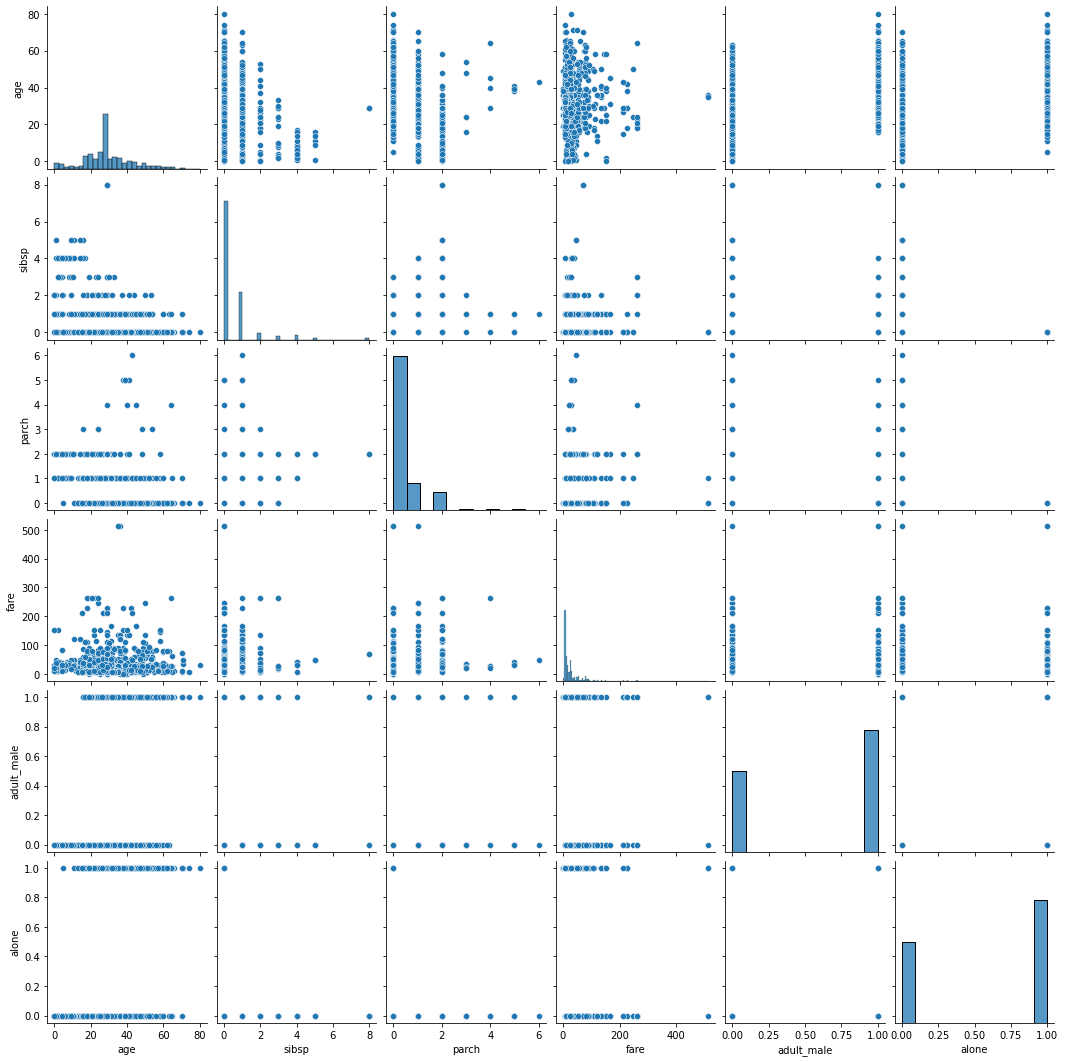

In [111]:
plt.figure(figsize = (10,6))
sns.pairplot(dataset)
plt.show()

C:\Users\Atul Vyas\AppData\Local\Temp\ipykernel_10600\2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot: >

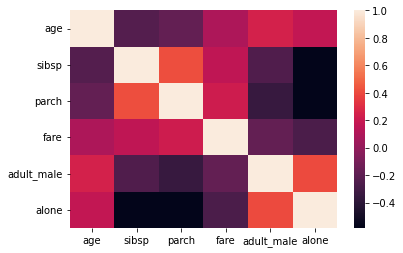

In [112]:
sns.heatmap(dataset.corr())

In [14]:
# Feature Engineering

# we will create a new column by the name of family which will be the sum sibsp and parch cols

dataset['family_size'] = dataset['parch'] + dataset['sibsp']

In [11]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# now we will engineer a new feature by the name of family type

def family_type(number):

    if number == 0:
        return 'Alone'
    elif number > 0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'



In [19]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,family_type
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,Medium
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,Medium
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,Alone
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,Medium
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,Alone


In [16]:
dataset['family_type'] = dataset['family_size'].apply(family_type)

In [18]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,family_type
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,Medium
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,Medium
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,Alone
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,Medium
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,Alone
